# fwhmのCr濃度依存性を求める（）

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd
import os
import sys
import re
import glob
import seaborn as sns
plt.rcParams["font.family"] = "Arial" # "Times New Roman"      #全体のフォントを設定
plt.rcParams["xtick.direction"] = "in"  # x軸の目盛線を内向きへ
plt.rcParams["ytick.direction"] = "in"  # y軸の目盛線を内向きへ
plt.rcParams["xtick.minor.visible"] = True  # x軸補助目盛りの追加
plt.rcParams["ytick.minor.visible"] = True  # y軸補助目盛りの追加
# plt.rcParams["xtick.major.width"] = 1.5              #x軸主目盛り線の線幅
# plt.rcParams["ytick.major.width"] = 1.5              #y軸主目盛り線の線幅
# plt.rcParams["xtick.minor.width"] = 1.0              #x軸補助目盛り線の線幅
# plt.rcParams["ytick.minor.width"] = 1.0              #y軸補助目盛り線の線幅
plt.rcParams["xtick.major.size"] = 10  # x軸主目盛り線の長さ
plt.rcParams["ytick.major.size"] = 10  # y軸主目盛り線の長さ
plt.rcParams["xtick.minor.size"] = 5  # x軸補助目盛り線の長さ
plt.rcParams["ytick.minor.size"] = 5  # y軸補助目盛り線の長さ
plt.rcParams["font.size"] = 12  # フォントの大きさ
plt.rcParams["axes.linewidth"] = 1  # 囲みの太さ
plt.rcParams["figure.figsize"] = [5, 4]
# 目盛方向を両側, 目盛の長さを5ポイント, 目盛と目盛ラベルの色
# ax.tick_params(direction="in", length=10, colors="black", width=1)
plt.rcParams["xtick.top"] = True
plt.rcParams["ytick.right"] = True


In [6]:

def plot(x, y, label, xlabel, ylabel, title, MIN_X, MAX_X, X_STEP, SUB_X_STEP, MIN_Y, MAX_Y, Y_STEP, SUB_Y_STEP, savepath, hlines=True):
    """
    """

    # Figureを設定
    fig = plt.figure()
    # Axesを追加
    ax = fig.add_subplot(111)
    ax.plot(x, y, label, color="red", marker="o", linestyle="-", markersize=3, linewidth=1, markerfacecolor="red", markeredgewidth=2, markeredgecolor="red", markerfacecoloralt="red")  # , x="x", y="fwhm")
    if hlines:
        ax.hlines(0, 0, MAX_Y, color='black', linestyles='dotted')
    else:
        pass

    # plt.show()
    # Axesのタイトルの設定
    ax.set_title(title)
    # 軸ラベルの設定
    ax.set_xlabel(xlabel, weight="light")
    ax.set_ylabel(ylabel, weight="light")
    # x軸の目盛設定
    ax.set_xlim(MIN_X, MAX_X)
    ax.set_xticks(np.arange(MIN_X, MAX_X, step=X_STEP))
    # y軸の目盛設定
    ax.set_ylim(MIN_Y, MAX_Y)
    ax.set_yticks(np.arange(0, MAX_Y, step=Y_STEP))
    # 副目盛りの設定
    ax.minorticks_on()
    ax.tick_params(which="minor", direction="in", length=5, colors="black")
    ax.set_xticks(np.arange(MIN_X, MAX_X, step=SUB_X_STEP), minor=True)
    ax.set_yticks(np.arange(0, MAX_Y, step=SUB_Y_STEP), minor=True)
    plt.savefig(savepath, dpi=300, bbox_inches='tight')


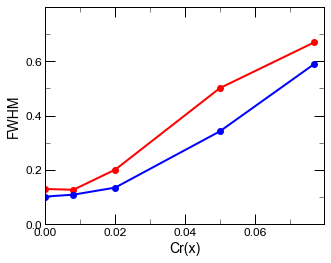

In [7]:
data_006 = {
    "sample": ["#1-1354", "#1-1360", "#1-1359", "#1-1361", "#1-1357"],
    "x": [0.0, 0.008, 0.02, 0.05, 0.077],
    "fwhm": [0.130, 0.127, 0.201, 0.501, 0.669],
    "center": [8.693, 8.693, 8.781, 8.846, 8.844]
}
data_0015 = {
    "sample": data_006["sample"],
    "x": data_006["x"],
    "fwhm": [0.102, 0.109, 0.135, 0.342, 0.589],
    "center": [22.265, 22.258, 22.438, 22.597, 22.629]
}

# Figureを設定
fig = plt.figure()
# Axesを追加
ax = fig.add_subplot(111)
ax.plot(data_006["x"], data_006["fwhm"], label="(006)", color="red", marker="o", linestyle="-", markersize=5, linewidth=2, markerfacecolor="red", markeredgewidth=2, markeredgecolor="red", markerfacecoloralt="red")# , x="x", y="fwhm")
# plt.legend()
# plt.show()
ax.plot(data_0015["x"], data_0015["fwhm"], label="(0015)", color="blue", marker="o", linestyle="-", markersize=5, linewidth=2, markerfacecolor="blue", markeredgewidth=2, markeredgecolor="blue", markerfacecoloralt="blue")# , x="x", y="fwhm")
# plt.legend()
# plt.show()

MIN_X = 0
MAX_X = 0.08
MIN_Y = 0
MAX_Y = 0.8
X_STEP = 0.02
Y_STEP = 0.2
SUB_X_STEP = 0.01
SUB_Y_STEP = 0.1
# Axesのタイトルの設定
# ax.set_title("Rocking FWHM", fontsize=16)
# 軸ラベルの設定
ax.set_xlabel("Cr(x)", size=14, weight="light")
ax.set_ylabel("FWHM", size=14, weight="light")
# x軸の目盛設定
ax.set_xlim(MIN_X, MAX_X)
ax.set_xticks(np.arange(MIN_X, MAX_X, step=X_STEP))
# y軸の目盛設定
ax.set_ylim(MIN_Y, MAX_Y)
ax.set_yticks(np.arange(MIN_Y, MAX_Y, step=Y_STEP))
# 副目盛りの設定
ax.minorticks_on()
ax.tick_params(which="minor", direction="in", length=5, width=0.5, colors="black")
ax.set_xticks(np.arange(MIN_X, MAX_X, step=SUB_X_STEP), minor=True)
ax.set_yticks(np.arange(MIN_Y, MAX_Y, step=SUB_Y_STEP), minor=True)
# メモリを上下左右に設定
# 目盛方向を両側, 目盛の長さを5ポイント, 目盛と目盛ラベルの色
ax.tick_params(direction="in", length=10, colors="black", width=1)
# ax.secondary_xaxis('top')
# ax.secondary_yaxis('right')
ax.yaxis.set_ticks_position('both')
ax.xaxis.set_ticks_position('both')
plt.savefig(f"/Users/uedataiga/Desktop/卒業研究/前期/Data/解析/中間報告/Rocking FWHM.png", dpi=300, bbox_inches='tight')


In [ ]:
MIN_X = 0
MAX_X = 0.08
MIN_Y = 0
MAX_Y = 0.8
X_STEP = 0.02
Y_STEP = 0.2
SUB_X_STEP = 0.01
SUB_Y_STEP = 0.1
savepath = f"/Users/uedataiga/Desktop/卒業研究/前期/Data/解析/中間報告/Rocking FWHM.png"
plot(
    df["temps"].values, df["I_Ryx"].values, label="",
    xlabel="Cr(x)", ylabel="FWHM", title=f"#1-{SAMPLE}",
    MIN_X=MIN_X, MAX_X=MAX_X, X_STEP=X_STEP,
    SUB_X_STEP=SUB_X_STEP, MIN_Y=MIN_Y, MAX_Y=MAX_Y, Y_STEP=Y_STEP, SUB_Y_STEP=SUB_Y_STEP, savepath=savepath, hlines=False
)
